# Import libraries

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline

# 1. Import data

In [30]:
file = '/Users/abhidalal/Desktop/Areas/Data Science/New-York-Taxi-Analysis/data/yellow_tripdata_2019-01.parquet'

In [32]:
taxi_jan_2019 = pd.read_parquet(file)
taxi_data = pd.concat([taxi_jan_2019])

In [33]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


# 2. Data exploration

In [37]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [39]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [41]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

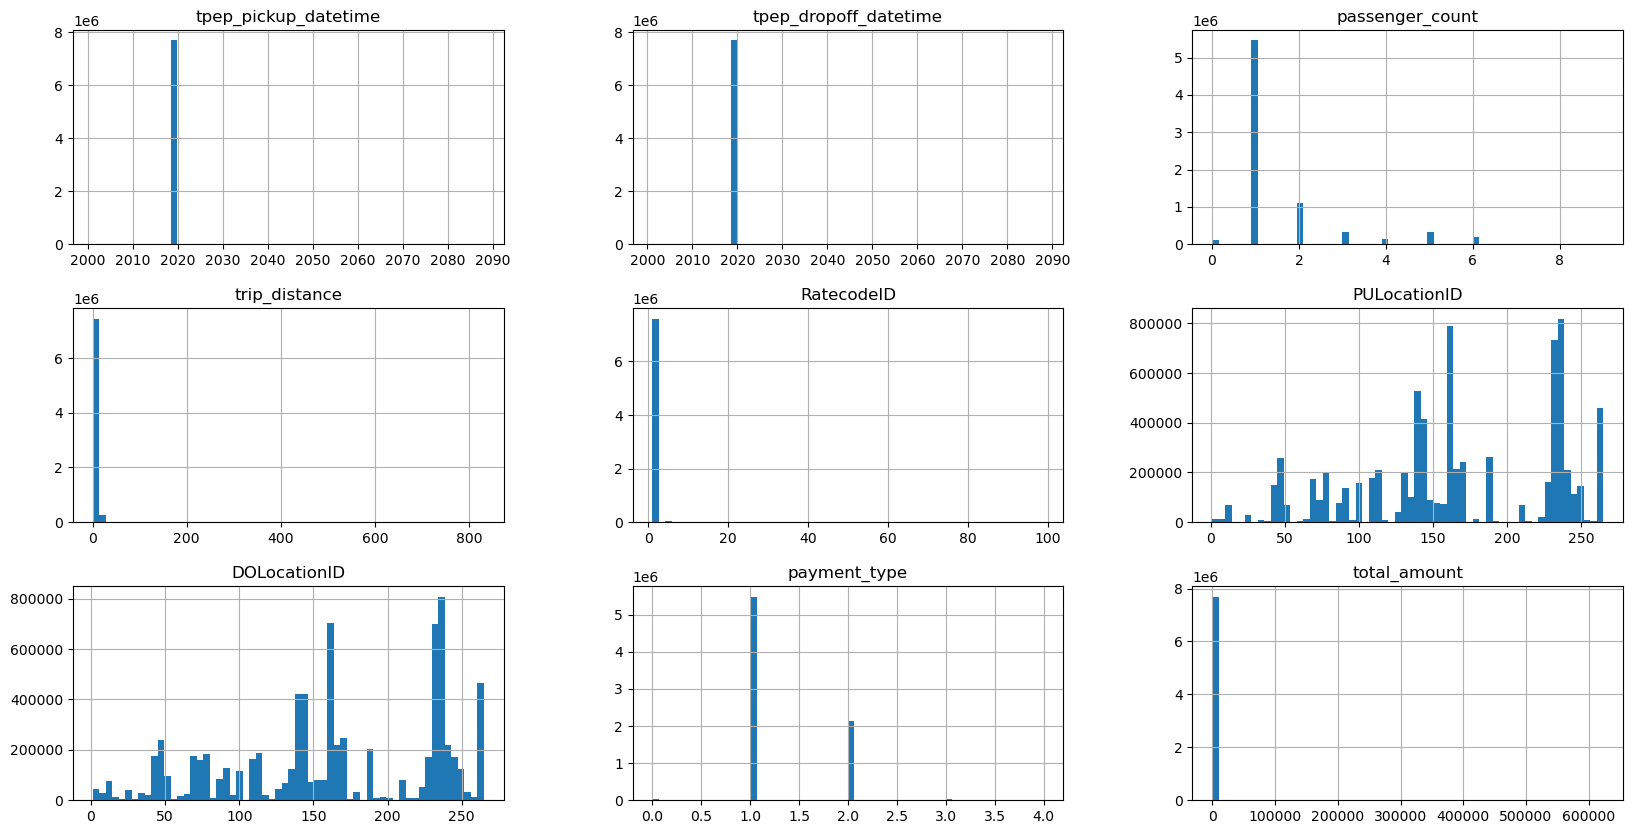

In [43]:
taxi_data.hist(figsize=(20,10),bins=60)

In [49]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

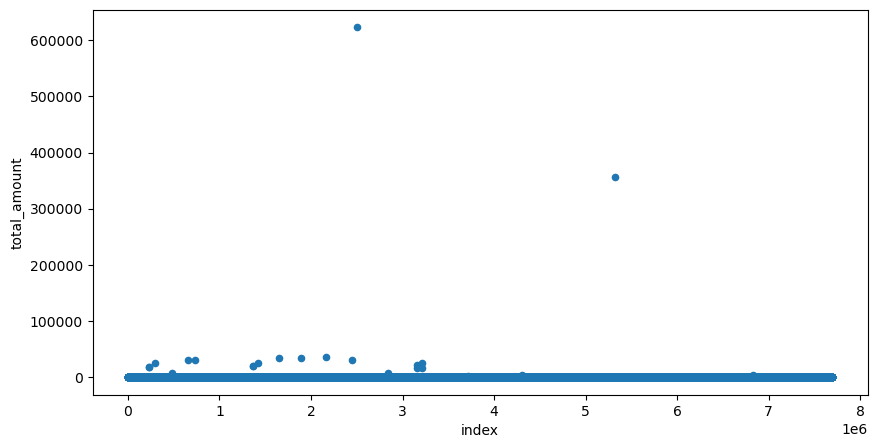

In [53]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

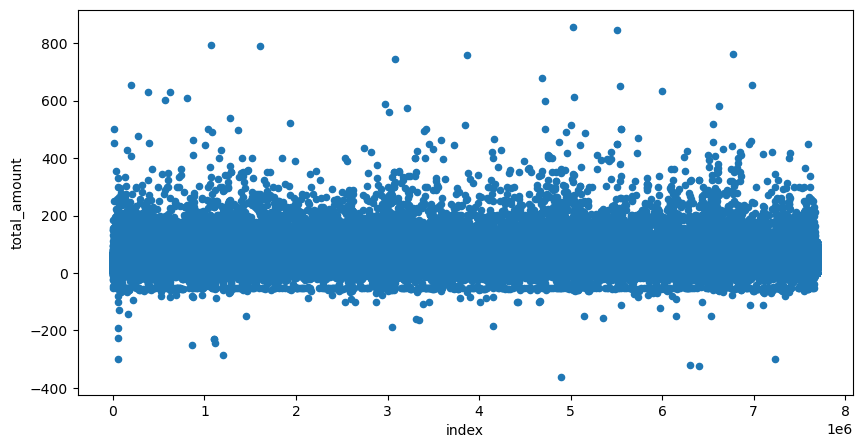

In [55]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

There are negative and very high value outliers.

In [66]:
taxi_data=taxi_data[(taxi_data['total_amount']<1000) & (taxi_data['total_amount']>=0)]

<Axes: xlabel='index', ylabel='total_amount'>

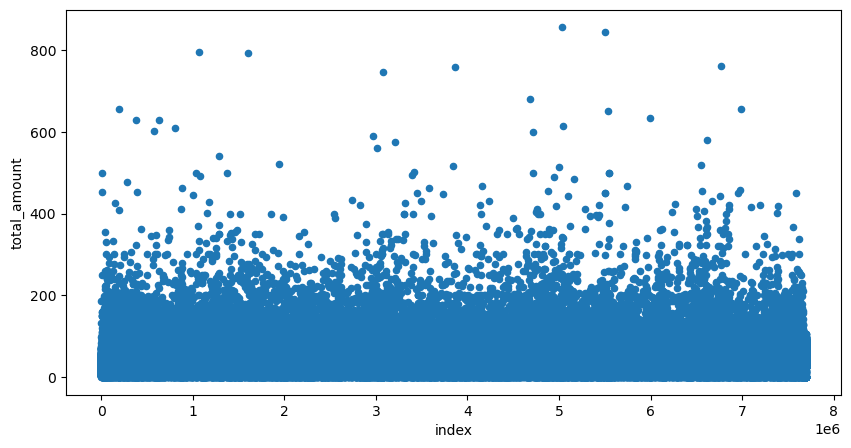

In [68]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: >

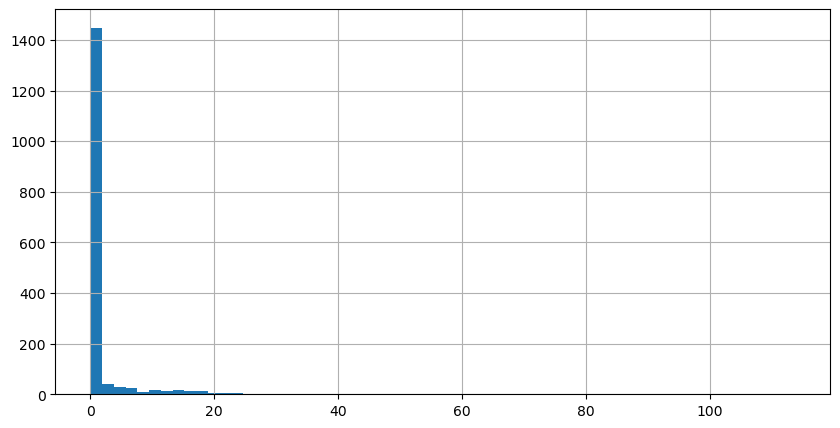

In [78]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10, 5))

In [80]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

In [82]:
taxi_data[taxi_data['total_amount']>200]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
11081,2019-01-01 00:41:25,2019-01-01 03:47:24,1.0,128.73,5.0,50,265,1,453.44
12931,2019-01-01 00:12:56,2019-01-01 00:13:21,1.0,0.00,5.0,234,234,1,251.00
13272,2018-11-28 17:05:35,2018-11-29 10:05:34,5.0,0.00,1.0,193,193,2,500.55
37441,2019-01-01 02:18:44,2019-01-01 02:19:42,2.0,0.00,5.0,265,265,1,222.95
38892,2019-01-01 02:36:54,2019-01-01 02:38:41,1.0,0.00,5.0,221,221,1,355.85
...,...,...,...,...,...,...,...,...,...
7648682,2019-01-31 22:12:08,2019-01-31 23:02:06,1.0,31.71,5.0,132,265,1,222.07
7653384,2019-01-31 22:09:45,2019-01-31 23:00:34,2.0,35.67,5.0,93,265,2,217.31
7655772,2019-01-31 22:31:50,2019-01-31 23:19:45,1.0,33.12,5.0,132,265,1,210.96
7656769,2019-01-31 23:52:26,2019-02-01 00:49:28,1.0,44.81,4.0,132,265,1,230.81


In [84]:
print(taxi_data)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0        2019-01-01 00:46:40   2019-01-01 00:53:20              1.0   
1        2019-01-01 00:59:47   2019-01-01 01:18:59              1.0   
2        2018-12-21 13:48:30   2018-12-21 13:52:40              3.0   
3        2018-11-28 15:52:25   2018-11-28 15:55:45              5.0   
4        2018-11-28 15:56:57   2018-11-28 15:58:33              5.0   
...                      ...                   ...              ...   
7696612  2019-01-31 23:37:20   2019-02-01 00:10:43              NaN   
7696613  2019-01-31 23:28:00   2019-01-31 23:50:50              NaN   
7696614  2019-01-31 23:11:00   2019-01-31 23:46:00              NaN   
7696615  2019-01-31 23:03:00   2019-01-31 23:14:00              NaN   
7696616  2019-01-31 23:41:03   2019-02-01 00:19:16              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 1.50         1.0           151           239     

In [90]:
filtered_taxi_data = taxi_data[(taxi_data['total_amount']<=200) & (taxi_data['total_amount']>=0)]

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

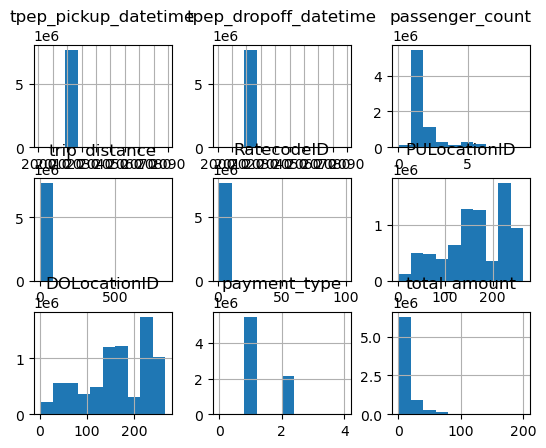

In [92]:
filtered_taxi_data.hist()

array([[<Axes: title={'center': 'total_amount'}>]], dtype=object)

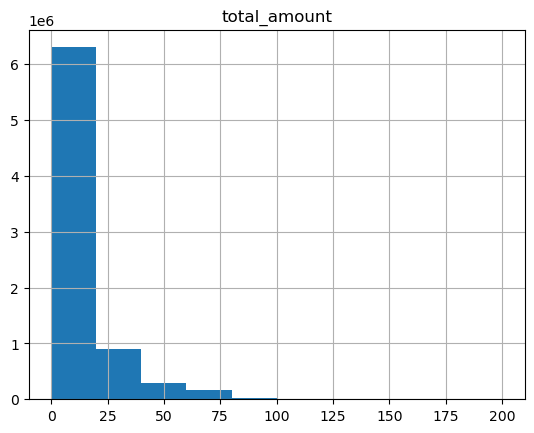

In [98]:
filtered_taxi_data.hist(column = 'total_amount')

In [102]:
filtered_taxi_data.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount'],
      dtype='object')

In [104]:
filtered_taxi_data['total_amount'].describe()

count    7.688324e+06
mean     1.561551e+01
std      1.355678e+01
min      0.000000e+00
25%      8.300000e+00
50%      1.130000e+01
75%      1.660000e+01
max      2.000000e+02
Name: total_amount, dtype: float64

In [112]:
filtered_taxi_data[filtered_taxi_data['total_amount']==0].shape

(1643, 9)

(1643, 9)


<Axes: xlabel='index', ylabel='total_amount'>

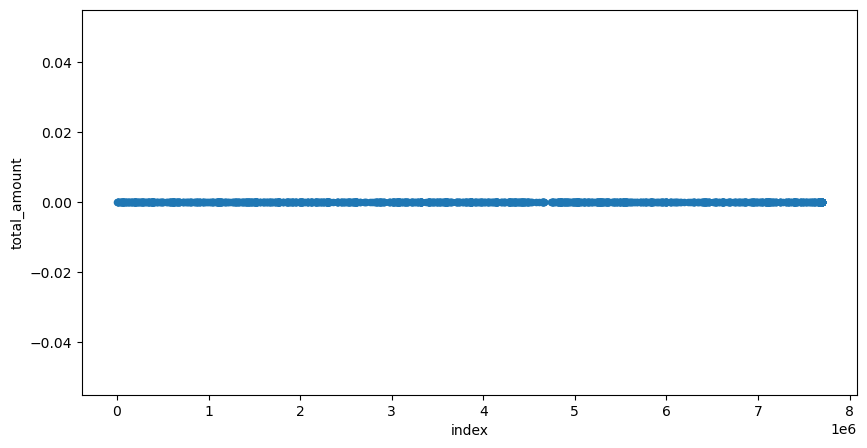

In [118]:
print(filtered_taxi_data[filtered_taxi_data['total_amount']==0].shape)
filtered_taxi_data[filtered_taxi_data['total_amount']==0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [120]:
filtered_taxi_data[filtered_taxi_data['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [122]:
filtered_taxi_data[filtered_taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

The majority of cases where the total amount is 0 is when the trip distance is 0. I do not know how to continue preparing the data. 

Now, the way to check how many cases there are where the total amount is 0 is to use

In [133]:
taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200)].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


In [135]:
taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200)].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,7686676,7686676,7.658235e+06,7.686676e+06,7.658235e+06,7.686676e+06,7.686676e+06,7.686676e+06,7.686676e+06
mean,2019-01-17 01:00:18.819176,2019-01-17 01:16:51.976337,1.567097e+00,2.828363e+00,1.057057e+00,1.653999e+02,1.636204e+02,1.285077e+00,1.561873e+01
min,2001-02-02 14:55:07,2001-02-02 15:07:27,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e-01
25%,2019-01-09 17:40:08.750000,2019-01-09 17:56:13.750000,1.000000e+00,9.000000e-01,1.000000e+00,1.270000e+02,1.130000e+02,1.000000e+00,8.300000e+00
50%,2019-01-16 22:15:26.500000,2019-01-16 22:29:59,1.000000e+00,1.540000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.130000e+01
75%,2019-01-24 19:12:31,2019-01-24 19:28:06,2.000000e+00,2.830000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.660000e+01
max,2088-01-24 00:25:39,2088-01-24 07:28:25,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.999800e+02
std,NaN,NaN,1.224496e+00,3.746262e+00,6.399484e-01,6.643461e+01,7.040460e+01,4.747507e-01,1.355549e+01


In [137]:
taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200)].isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28441
trip_distance                0
RatecodeID               28441
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [141]:
taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200) & (taxi_data['passenger_count']=='')].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount


In [143]:
taxi_data[taxi_data['passenger_count']==''].shape

(0, 9)

In [145]:
taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200)].shape

(7686676, 9)

In [147]:
taxi_data.shape

(7689467, 9)

There is not much of a difference between OG and OG w/outliers removed.

In [150]:
taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200)].isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28441
trip_distance                0
RatecodeID               28441
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64